# Background

The goal is to build a search algorithm to find a random grain of rice. This will then be classified by variety before being binned to an orientation category. From here, the goal is to classify all images in each variety by orientation and display percentages and time involved.

The initial orientation binning will be vertical or not vertical, with vertical being defined as the grain within $\pm 30\degree$ of the vertical axis.

The dataset comes from [here](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset).

# Package Setup

In [15]:
import matplotlib.pyplot as plt
from skimage import color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter, line
from skimage.io import imread
from math import degrees
from math import pi
from os import walk, path

# Data Import and Prep

In [51]:
# image_rgb = imread('Rice_Image_Dataset/Ipsala/Ipsala (1).jpg')
# image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (17).jpg')
# image_rgb = imread('Rice_Image_Dataset/Karacadag/Karacadag (10).jpg')
# image_rgb = imread('Rice_Image_Dataset/Basmati/Basmati (1).jpg')
image_rgb = imread('Rice_Image_Dataset/Jasmine/Jasmine (24).jpg')
image_gray = color.rgb2gray(image_rgb)

# Model Setup
## Search Algorithm

In [91]:
# https://www.tutorialspoint.com/file-searching-using-python

def find_files(filename, search_path):
   result = []

   # Walking top-down from the root
   for root, dir, files in walk(search_path):
      if filename in files:
         result.append(path.join(root, filename))
         result = str(result)
         result = result.replace("'", "")
         result = result.replace("[", "")
         result = result.replace("]", "")
   return str(result)

print(find_files("Basmati (1).jpg", "Rice_Image_Dataset"))

Rice_Image_Dataset/Basmati/Basmati (1).jpg


In [92]:
file = find_files('{} ({}).jpg'.format(rice_choice, image_number), 'Rice_Image_Dataset')

## Classification Algorithm

In [30]:
def grain_orientation(radians):
    if radians >= pi/3 and radians <= 2*pi/3 or radians >= 4/3*pi and radians <= 5/3*pi:
        return 'Vertical'
    else:
        return 'not Vertical'

## Orientation Algorithm

[Orientation example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

[ellipse example](https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html)

In [52]:
# Find the edges of the rice grain
edges = canny(image_gray, sigma = 2.0, low_threshold = 0.55, high_threshold = 0.8)

# Perform a Hough Ellipse Transform to find a valid elliptical approximation of the grain
# Threshold of 150 holds for a small sample of non-symmetrical rice grains
result = hough_ellipse(edges, accuracy = 20, threshold = 150)
result.sort(order = 'accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5] # This is what really matters for the program

In [42]:
grain_orientation((orientation + 90))

'not Vertical'

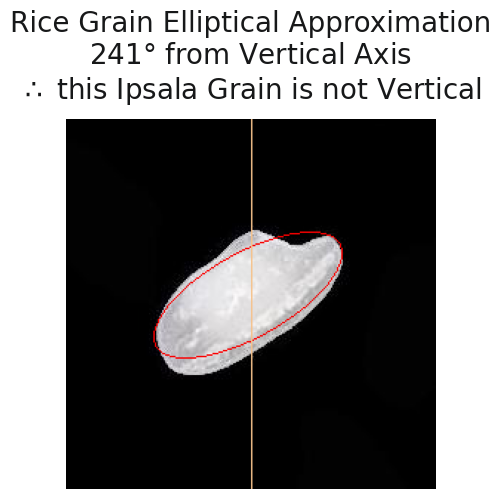

In [50]:
# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (250, 0, 0)

# Draw vertical reference line
vertical_line = line(0, 125, 249, 125)
image_rgb[vertical_line] = (246, 194, 139)

# Plot the rice grain and ellipse
fig, ax = plt.subplots()
ax.set_title('Rice Grain Elliptical Approximation\n${:.0f}\\degree$ from Vertical Axis\n$\\therefore$ this {} Grain is {}'.format((degrees(orientation) + 90), rice_choice, grain_orientation(orientation)),
             fontsize = 20, pad = 15).set_color('#171819')
ax.imshow(image_rgb)
# https://stackoverflow.com/a/25864515/13801562
ax.axis('off')
plt.show()

# Pseudo-code Outline

"Pick a number between 1 and 15,000" \
Store result 

"Choose a rice varietal" \
Display options \
Store result 

Find image \
Find orientation \
   Classify as vertical or not \
Display image \
   Title includes whether or not grain is vertical


In [78]:
# https://stackoverflow.com/a/23326219/13801562
def number():
    while True:
        try:
            chosen_number = int(input('Choose a whole number between 1 and 15,000'))
            break
        except:
            print('Your answer must be an integer between 1 and 15,000. Try again!')
    return chosen_number

def rice_options():
    while True:
        try:
            rice = input('Choose one of the following rice varietals:\nArborio\nBasmati\nIpsala\nJasmine\nKaracadag\n')
            break
        except:
            print('Your answer must be one of the following rice varietals:\nArborio\nBasmati\nIpsala\nJasmine\nKaracadag\n')
    return rice
        

In [77]:
image_number = number()

In [80]:
rice_choice = rice_options()

In [1]:
# Setup
import matplotlib.pyplot as plt
from skimage import color
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter, line
from skimage.io import imread
from math import degrees
from math import pi
from os import walk, path

# Functions
# https://www.tutorialspoint.com/file-searching-using-python

def find_files(filename, search_path):
   result = []

   # Walking top-down from the root
   for root, dir, files in walk(search_path):
      if filename in files:
         result.append(path.join(root, filename))
         result = str(result)
         result = result.replace("'", "")
         result = result.replace("[", "")
         result = result.replace("]", "")
   return str(result)

def grain_orientation(radians):
    if radians >= pi/2 and radians <= 2*pi/3 or radians >= 4/3*pi and radians <= 5/3*pi:
        return 'Vertical'
    else:
        return 'not Vertical'
    
# https://stackoverflow.com/a/23326219/13801562
def number():
    while True:
        try:
            chosen_number = int(input('Choose a whole number between 1 and 15,000\n'))
            break
        except:
            print('Your answer must be an integer between 1 and 15,000. Try again!')
    return chosen_number

def rice_options():
    while True:
        try:
            rice = input('Choose one of the following rice varietals:\nArborio\nBasmati\nIpsala\nJasmine\nKaracadag\n')
            break
        except:
            print('Your answer must be one of the following rice varietals:\nArborio\nBasmati\nIpsala\nJasmine\nKaracadag\n')
    return rice

# User Input Intermediate values
image_number = number()
rice_choice = rice_options()
file = find_files('{} ({}).jpg'.format(rice_choice, image_number), 'Rice_Image_Dataset')

In [2]:
image_rgb = imread(str(file))